In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as  sns
from sklearn.cluster  import KMeans
import random

In [73]:
from sklearn.datasets import make_blobs

In [74]:
X , y=make_blobs(centers=3 , random_state=42)

C:\Users\Rimi Das\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

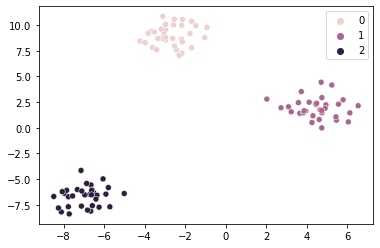

In [75]:
sns.scatterplot(X[:,0] , X[:,1] , hue=y)

In [76]:
 # kmeans:minimize the loss in the distance between given point and clusters centres

In [77]:
model=KMeans(n_clusters=4)

In [78]:
model.fit(X)

KMeans(n_clusters=4)

In [79]:
y_gen = model.labels_

C:\Users\Rimi Das\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

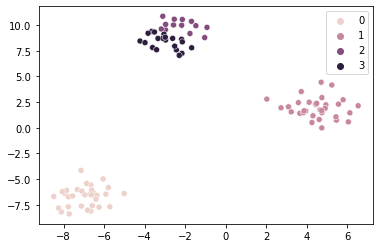

In [80]:
sns.scatterplot(X[:,0] , X[:,1] , hue=y_gen)

In [81]:
model.cluster_centers_


array([[-6.95170962, -6.67621669],
       [ 4.49951001,  1.93892013],
       [-2.20127958,  9.94858935],
       [-2.95660471,  8.30877152]])

C:\Users\Rimi Das\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


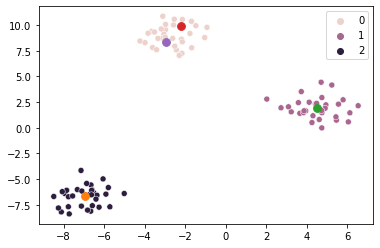

In [82]:
sns.scatterplot(X[:,0] , X[:,1] , hue=y)
for center in model.cluster_centers_:
    plt.scatter(center[0] , center[1] , s=60)

C:\Users\Rimi Das\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

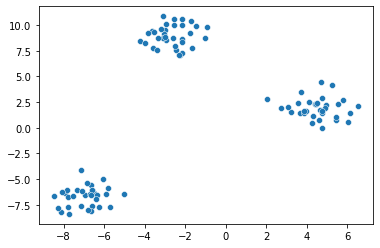

In [83]:
sns.scatterplot(X[:,0] , X[:,1] )

In [124]:
class Cluster:
    
    def __init__(self , center):
        self.center = center
        self.points=[]
    
    def distance(self , point):
        return np.sqrt(np.sum( (point - self.center)**2))

class CustomKMeans:
    def __init__(self , n_clusters=3 , max_iters=20 ):
        self.n_clusters= n_clusters
        self.max_iters = max_iters
        
        
    def fit(self , X):
        clusters = []
        for i in range(self.n_clusters):
            cluster = Cluster(center = random.choice(X))
            clusters.append(cluster)
       
                
        
        for i in range(self.max_iters):       
            labels =[]            

            for point in X:
                distances =[]
                for cluster in clusters:
                     distances.append(cluster.distance(point))
                
                closest_idx =np.argmin(distances)
                closest_cluster = clusters[ closest_idx]    
                closest_cluster.points.append(point)
                labels.append( closest_idx)   
             
            for  cluster in clusters:
                 cluster.center = np.mean(cluster.points , axis =0)    
              
        self.labels_ = labels        
        self.cluster_centers_ =[cluster.center for cluster in clusters]

In [125]:
model=CustomKMeans(n_clusters=2)
 
model.fit(X)

C:\Users\Rimi Das\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

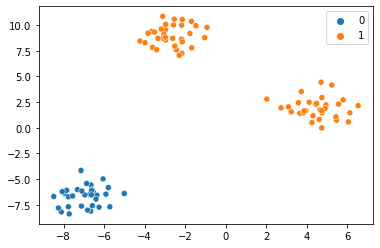

In [126]:
sns.scatterplot(X[:,0] , X[:,1] , hue=model.labels_)


In [ ]:
1.09.54